In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

In [ ]:
# Import datasets
blueberry_df = pd.read_csv("train.csv")
blueberry_df = blueberry_df.drop(columns=["id"])

# Define features and target variable
label = "yield"
features = list(blueberry_df.columns)
features.remove(label)
X = blueberry_df[features]
y = blueberry_df[label]

In [ ]:
# Split data into train and test sets
test_size = 0.2
seed = 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# Standardize features
scaler = StandardScaler().set_output(transform = "pandas")
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# grid search for tuning parameters
params = {'hidden_layer_sizes': [(50, 50, 50), (100, 50, 25), (100, 50, 50)],
          'activation': ['logistic', 'relu'],
          'alpha': [0.0001, 0.5],
          'max_iter': [500, 1000, 1500]}

grid_search = GridSearchCV(
    MLPRegressor(),
    params,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_result = grid_search.fit(X_train_scaled, y_train)

best_params = grid_result.best_params_

In [ ]:
print(best_params)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 500}


In [ ]:
# Build MLP model
model = MLPRegressor(hidden_layer_sizes=best_params["hidden_layer_sizes"],
                     activation=best_params["activation"],
                     alpha=best_params["alpha"],
                     max_iter=best_params["max_iter"],
                    random_state=seed)
history = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate model performance
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
# Print metrics
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Percentage Error (MAPE): ", mape)
print("R Squared: ", r2)

Mean Absolute Error (MAE):  366.72919542330465
Mean Squared Error (MSE):  301962.375449989
Mean Absolute Percentage Error (MAPE):  0.06502517081528449
R Squared:  0.8292356423724393


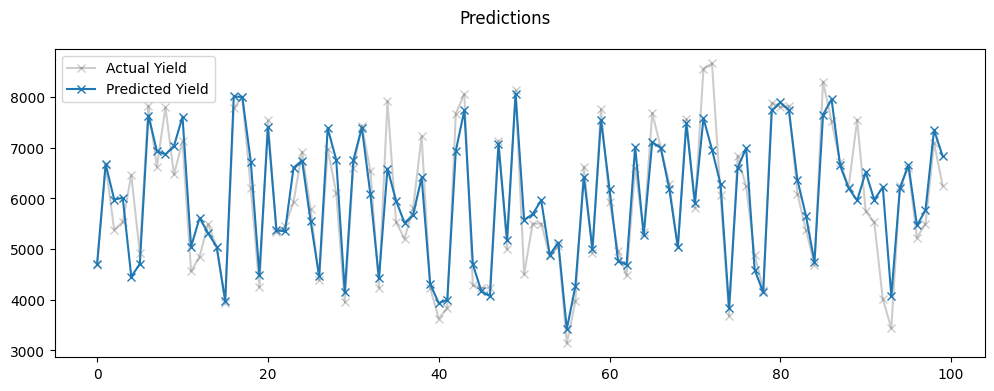

In [ ]:
# Extra Graphing
first_part = slice(None, 100)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions")
ax.plot(
    y_test.values[first_part],
    "x-",
    alpha=0.2,
    label="Actual Yield",
    color="black",
)
ax.plot(y_pred[first_part], "x-", label="Predicted Yield")
_ = ax.legend()